**Context**

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

**Content**

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

**Feature Information**
* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


**Citation**
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

**Acknowledgements**
The data released by the SDSS is under public domain. Its taken from the current data release RD17.

More information about the license: http://www.sdss.org/science/image-gallery/



**Aim**:
 To Classify the Stars Based on the given features like Right Ascension angle, Declination angle, Ultraviolet filter in the photometric system, etc., wheather it is galazy, star, or quasar object.


**Solution**:
To Classify such a thing we have dedicated algorithms which will process the data based on the ways of approaches they have, and give the final result as predictions according to patterns.

Basic Classification Algorithms we have is, Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNearest Neighbors, Support Vectory Machine, etc.,





In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as ms

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Metrics 
from sklearn.metrics import confusion_matrix, classification_report,recall_score, cohen_kappa_score, accuracy_score

warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('star_classification.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [52]:
def info(data) :
        # Basic Information about the dataset
        data.info()

        # Dimensions of dataset
        print('Shape of The dataset: ', data.shape)
        print('Total Size of the dataset: ', data.size)
        print('Dimensions of dataset: ', data.ndim)


        # Descriptive Statistics of Numerical Columns
        num_des = pd.DataFrame(data.describe())
        print('\nExporting')
        print('Descriptive Statistical Report for Numerical Columns')
        num_des.to_excel('Statistical Report.xlsx')


        # Quantify the Numerical Columns and Categorical Columns
        num_cols = data.select_dtypes(include = ['int64', 'int32', 'int16','float64', 'float32', 'float16']).columns
        print('\nNumerical Columns: ', num_cols.values)
        print('Number of Numerical Columns in the dataset: ', num_cols.nunique())

        cat_cols = data.select_dtypes(include = ['object', 'category']).columns
        print('\nCategorical Columns: ', cat_cols.values)
        print('Number of Categorical Columns in the dataset: ', cat_cols.nunique())


        # Quantifying Percentage of Missing Values in the dataset
        Null = pd.DataFrame(round(data.isnull().mean() * 100 , 2), columns = ['Percentage'])
        print('\n\nPercentage of Null Values in the dataset: \n',Null)

        # Determining Cardinality
        cardinality = pd.DataFrame(data.nunique(), columns= ['Counts'])
        print('\n\nCardinality: \n', cardinality)

In [53]:
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

**Missing Value Analysis**

<AxesSubplot:>

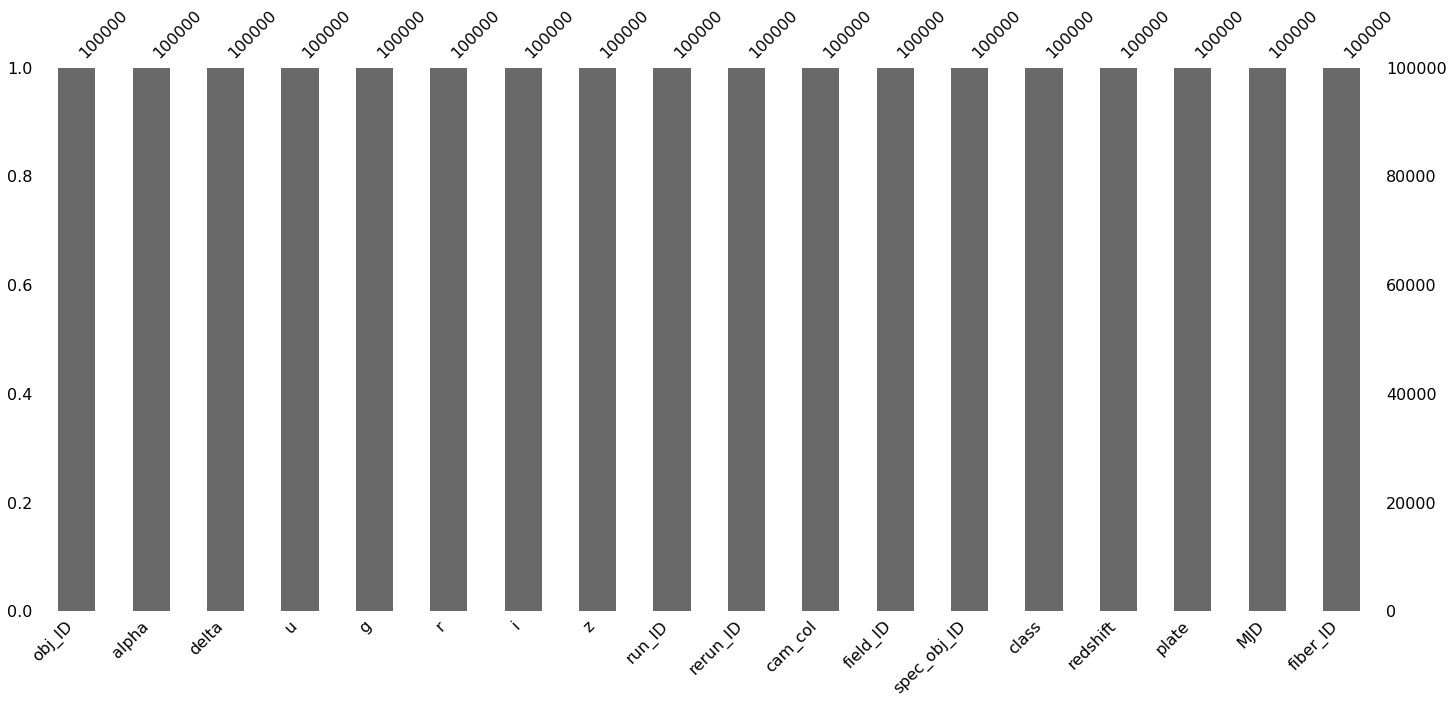

In [54]:
ms.bar(data)

**EDA**

<AxesSubplot:>

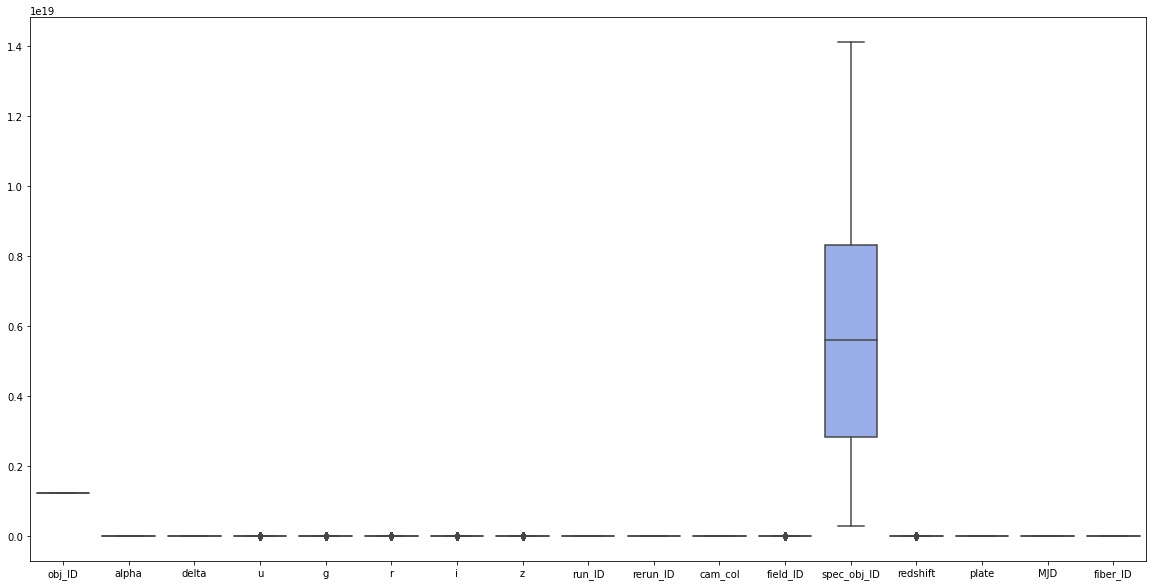

In [55]:
plt.figure(figsize= (20,10))
sns.boxplot(data = data)

**Type Casting**

In [56]:
data[['run_ID','rerun_ID','cam_col','class']] = data[['run_ID','rerun_ID','cam_col','class']].astype('category')

In [57]:
print('Categorical columns: ',data.select_dtypes(include = ['object','category']).columns)
print('Numerical Columns: ', data.select_dtypes(exclude= ['object', 'category']).columns)

Categorical columns:  Index(['run_ID', 'rerun_ID', 'cam_col', 'class'], dtype='object')
Numerical Columns:  Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID',
       'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID'],
      dtype='object')


**Pair Plot**

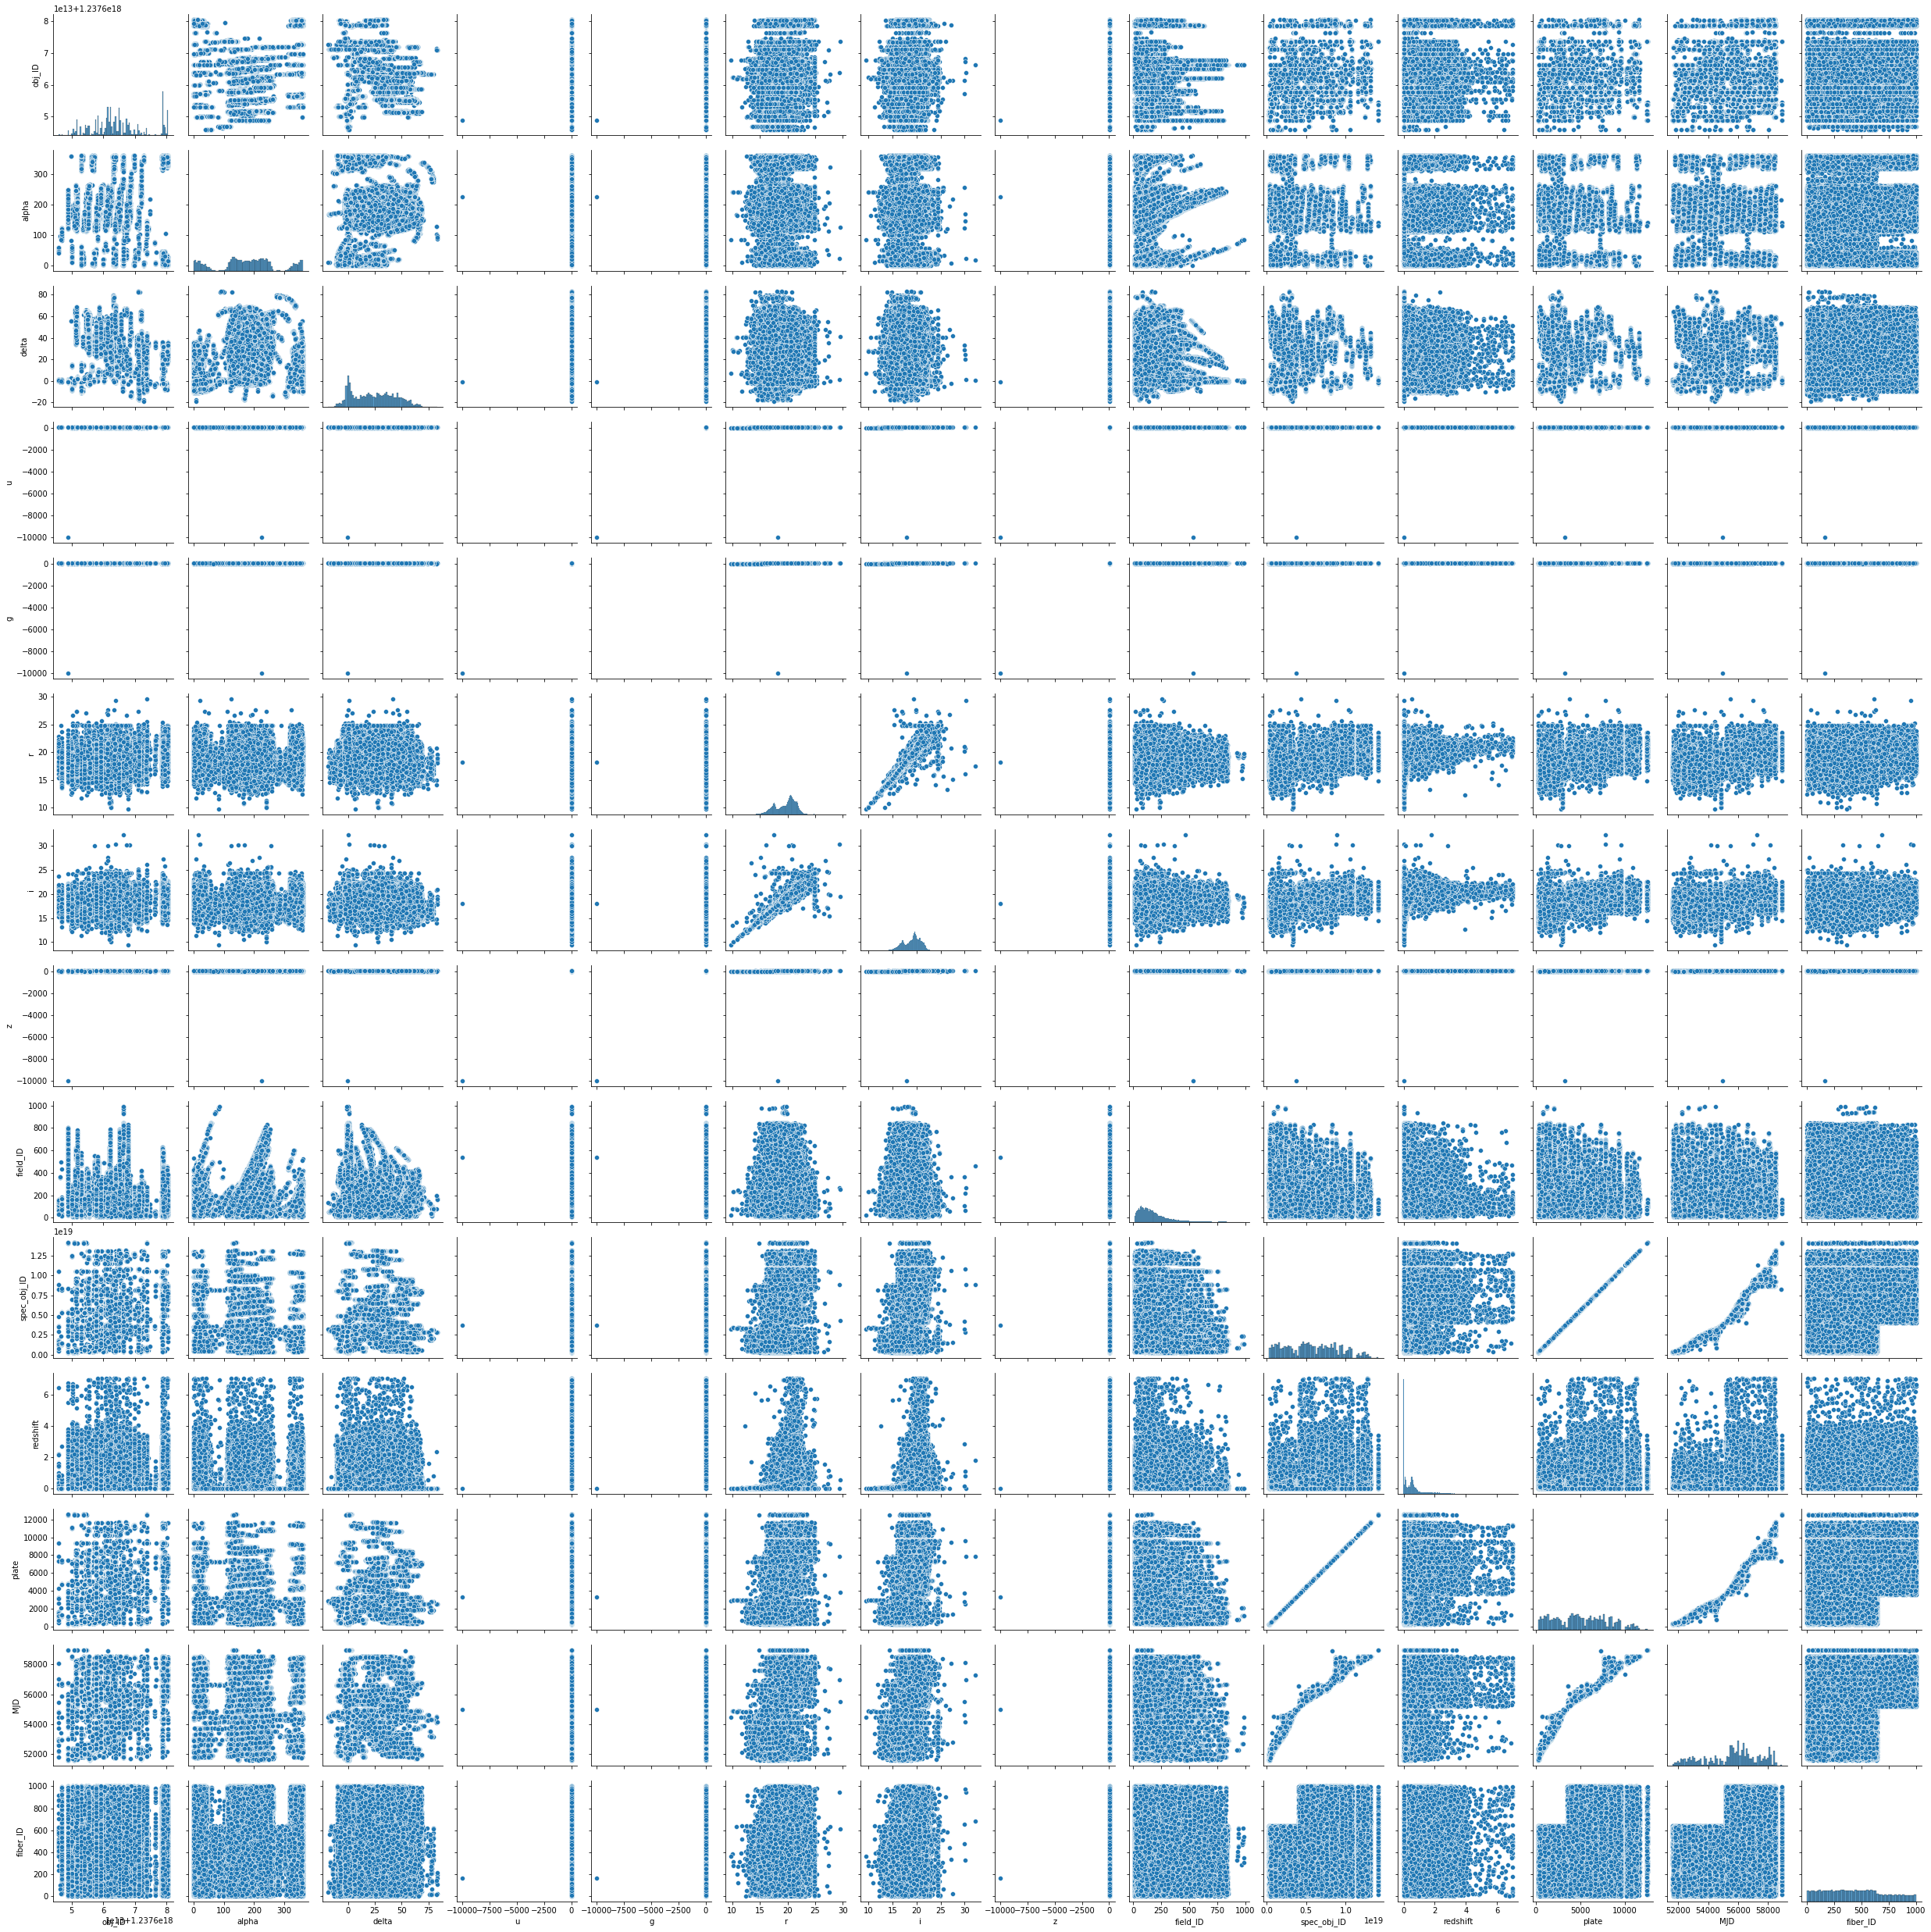

In [18]:
sns.pairplot(data = data)

**Prevalance Rate**

In [58]:
data['class'].value_counts(normalize= True)

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: class, dtype: float64

**Preprocessing - Encoding** 

In [59]:
data['class'] = data['class'].replace({'GALAXY': 1, 
                                       'STAR': 2,
                                       'QSO': 3})


In [60]:
data['class'].value_counts(normalize= True)

1    0.59445
2    0.21594
3    0.18961
Name: class, dtype: float64

**Sepereating Independent and Dependent variable**

In [61]:
x = data.drop(['class'], axis = 1)
y = data['class']

**Preprocessing - Train Test Split**

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75000, 17), (25000, 17), (75000,), (25000,))

**Preprocessing  - Feature Scaling**

In [63]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Model Building**

In [26]:

def metrics(a,b):
    cm = confusion_matrix(a,b)
    print('Confusion Matrix: \n',cm)
    cr = classification_report(a,b)
    print('Classification Report: \n',cr)
    print(f'Accuracy Score: {accuracy_score(a,b)}')
    
   
    

In [27]:
report = pd.DataFrame(columns = ['Model', 'Train Accuracy','Test Accuracy','Cohen-Kappa Score','Recall', 'Mean Score'])

**Logistic Regression**

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)
y_pred1 = lr.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

acc_lr_train = accuracy_score(y_train, y_pred)
acc_lr_test = accuracy_score(y_test, y_pred1)

cv_lr = cross_val_score(lr, x_train, y_train, cv = 5)
print(f'Mean Score of Logistic Model: {cv_lr.mean()}')

report = report.append({'Model': 'Logistic Regression',
                        'Train Accuracy': acc_lr_train,
                        'Test Accuracy': acc_lr_test,
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_lr.mean()}, ignore_index= True)


Train Metrics
Confusion Matrix: 
 [[42502  1417   665]
 [ 1403 14786     6]
 [ 1737    51 12433]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94     44584
           2       0.91      0.91      0.91     16195
           3       0.95      0.87      0.91     14221

    accuracy                           0.93     75000
   macro avg       0.93      0.91      0.92     75000
weighted avg       0.93      0.93      0.93     75000

Accuracy Score: 0.9296133333333333
None

Test Metrics
Confusion Matrix: 
 [[14174   467   220]
 [  459  4938     2]
 [  598    14  4128]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94     14861
           2       0.91      0.91      0.91      5399
           3       0.95      0.87      0.91      4740

    accuracy                           0.93     25000
   macro avg       0.93      0.91      0.92     25000
weighte

**Random Forest**

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_train)
y_pred1 = rf.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_rf = cross_val_score(rf, x_train, y_train, cv = 5)


report = report.append({'Model': 'Random Forest',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_rf.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[44584     0     0]
 [    0 16195     0]
 [    2     0 14219]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     44584
           2       1.00      1.00      1.00     16195
           3       1.00      1.00      1.00     14221

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

Accuracy Score: 0.9999733333333334
None

Test Metrics
Confusion Matrix: 
 [[14621    87   153]
 [    2  5397     0]
 [  336     0  4404]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     14861
           2       0.98      1.00      0.99      5399
           3       0.97      0.93      0.95      4740

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighte

**Gradient Boosting Classifier**

In [36]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_train)
y_pred1 = gb.predict(x_test)


print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_gb = cross_val_score(gb, x_train, y_train, cv = 5)


report = report.append({'Model': 'Gradient Boosting',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_gb.mean()}, ignore_index= True)


Train Metrics
Confusion Matrix: 
 [[43824   310   450]
 [    0 16195     0]
 [ 1120     3 13098]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     44584
           2       0.98      1.00      0.99     16195
           3       0.97      0.92      0.94     14221

    accuracy                           0.97     75000
   macro avg       0.97      0.97      0.97     75000
weighted avg       0.97      0.97      0.97     75000

Accuracy Score: 0.9748933333333333
None

Test Metrics
Confusion Matrix: 
 [[14599   102   160]
 [    0  5398     1]
 [  407     0  4333]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98     14861
           2       0.98      1.00      0.99      5399
           3       0.96      0.91      0.94      4740

    accuracy                           0.97     25000
   macro avg       0.97      0.97      0.97     25000
weighte

**MLP Classifier**

In [34]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_train)
y_pred1 = mlp.predict(x_test)


print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_mlp = cross_val_score(mlp, x_train, y_train, cv = 5)


report = report.append({'Model': 'MLP Classifier',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_mlp.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[43673   472   439]
 [   12 16183     0]
 [ 1246     4 12971]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98     44584
           2       0.97      1.00      0.99     16195
           3       0.97      0.91      0.94     14221

    accuracy                           0.97     75000
   macro avg       0.97      0.96      0.97     75000
weighted avg       0.97      0.97      0.97     75000

Accuracy Score: 0.9710266666666667
None

Test Metrics
Confusion Matrix: 
 [[14566   135   160]
 [    3  5395     1]
 [  424     2  4314]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98     14861
           2       0.98      1.00      0.99      5399
           3       0.96      0.91      0.94      4740

    accuracy                           0.97     25000
   macro avg       0.97      0.96      0.97     25000
weighte

**K Nearest Neighbors**

100%|██████████| 9/9 [03:46<00:00, 25.17s/it]


     K  Train Accuracy  Test Accuracy
0  1.0        1.000000        0.87084
1  2.0        0.920573        0.85924
2  3.0        0.927267        0.87532
3  4.0        0.903440        0.86508
4  5.0        0.905307        0.87076
5  6.0        0.891027        0.86204
6  7.0        0.892760        0.86488
7  8.0        0.882373        0.85960
8  9.0        0.883320        0.85984


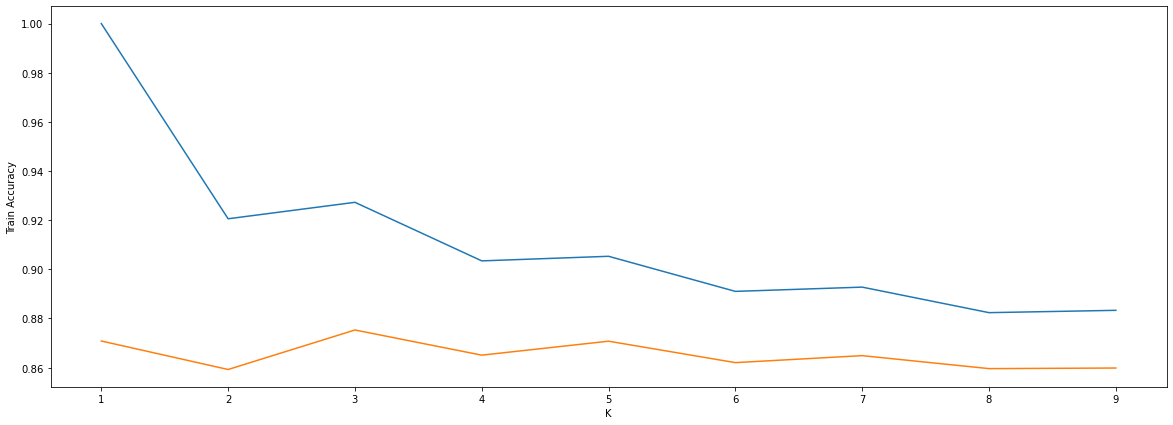

In [35]:
from tqdm import tqdm
knn_report = pd.DataFrame(columns = ['K', 'Train Accuracy', 'Test Accuracy'])
for i in tqdm(range(1, 6)):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    
    pre_train = knn.predict(x_train)
    pre_test = knn.predict(x_test)
    
    knn_report = knn_report.append({'K': i,
                                    'Train Accuracy': accuracy_score(y_train, pre_train),
                                    'Test Accuracy': accuracy_score(y_test, pre_test)}, ignore_index = True)
    
print(knn_report)    
plt.figure(figsize= (20, 7))
sns.lineplot(data = knn_report, x = 'K', y = 'Train Accuracy')
sns.lineplot(data = knn_report, x = 'K', y = 'Test Accuracy');

In [41]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

pre_train = knn.predict(x_train)
pre_test = knn.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_knn = cross_val_score(knn, x_train, y_train, cv = 5)


report = report.append({'Model': 'KNN Classifier',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_knn.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[43824   310   450]
 [    0 16195     0]
 [ 1120     3 13098]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     44584
           2       0.98      1.00      0.99     16195
           3       0.97      0.92      0.94     14221

    accuracy                           0.97     75000
   macro avg       0.97      0.97      0.97     75000
weighted avg       0.97      0.97      0.97     75000

Accuracy Score: 0.9748933333333333
None

Test Metrics
Confusion Matrix: 
 [[14599   102   160]
 [    0  5398     1]
 [  407     0  4333]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98     14861
           2       0.98      1.00      0.99      5399
           3       0.96      0.91      0.94      4740

    accuracy                           0.97     25000
   macro avg       0.97      0.97      0.97     25000
weighte

In [42]:
report

,Model,Train Accuracy,Test Accuracy,Cohen-Kappa Score,Recall,Mean Score
0,Logistic Regression,0.929613,0.92960,0.873845,0.92960,0.926413
1,Random Forest,0.999973,0.97688,0.958889,0.97688,0.976293
2,MLP Classifier,0.971027,0.97100,0.948378,0.97100,0.969227
3,Gradient Boosting,0.974893,0.97320,0.952279,0.97320,0.972947
4,KNN Classifier,0.974893,0.97320,0.952279,0.97320,0.868320


From the above Report, we can analyse the performance of Various algorithmns. 

Random Forest is performing well in both train and test data and provide very reliable results, when comparing mean score also it provide much good results. So my best model to pick for further alteration would be Random Forest Classifier.


Random Forest is an ensemble technique where Row and Column Sampling is done in the given dataset, from that tree will be created which helps to provide reliable results. As a result it contains of Large number of Decision Trees incorported in single bx to provide much accurate result.

In [44]:
cross_val = pd.DataFrame(columns = ['Logistic Regression','Random Forest','MLP Classifier','Gradient Boosting', 'KNN'])
cross_val['Logistic Regression'] = cv_lr
cross_val['Random Forest'] = cv_rf
cross_val['Gradient Boosting'] = cv_gb
cross_val['KNN'] = cv_knn
cross_val['MLP Classifier'] = cv_mlp
cross_val


,Logistic Regression,Random Forest,MLP Classifier,Gradient Boosting,KNN
0,0.925067,0.977267,0.970400,0.973800,0.866867
1,0.928533,0.975667,0.968933,0.972133,0.872467
2,0.922800,0.975467,0.969133,0.972333,0.867133
3,0.928400,0.976067,0.966333,0.972733,0.865800
4,0.927267,0.977000,0.971333,0.973733,0.869333


In [64]:
print(x_train.shape, y_train.shape)
y_train.value_counts(normalize = True)

(75000, 17) (75000,)


1    0.594453
2    0.215933
3    0.189613
Name: class, dtype: float64

Our Data is Not so balanced, so whatever the results we obtained is not so reliable and some results are biased over Majority Class. To overcome these problems we have to Balance the data either by Undersampling or Oversampling.

* **OverSampling** - Oversampling methods duplicate or create new synthetic examples in the minority class
* **UnderSampling** - undersampling methods delete or merge examples in the majority class.



*NearMiss - UnderSampling*

Near-miss is an algorithm that can help in balancing an imbalanced dataset. It can be grouped under undersampling algorithms and is an efficient way to balance the data. The algorithm does this by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution

In [48]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

x_train, y_train = nm.fit_sample(x_train, y_train)
x_train.shape, y_train.shape

((42663, 17), (42663,))

In [49]:
y_train.value_counts(normalize = True)

1    0.333333
2    0.333333
3    0.333333
Name: class, dtype: float64

In [67]:
report_balanced = pd.DataFrame(columns= ['Model', 'Train Accuracy', 'Test Accuracy', 'Cohen-Kappa Score', 'Recall', 'Mean Score'])
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_train)
y_pred1 = rf.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_rf = cross_val_score(rf, x_train, y_train, cv = 5)

report_balanced = report_balanced.append({'Model': 'Random Forest',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_rf.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[44584     0     0]
 [    0 16195     0]
 [    0     0 14221]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     44584
           2       1.00      1.00      1.00     16195
           3       1.00      1.00      1.00     14221

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

Accuracy Score: 1.0
None

Test Metrics
Confusion Matrix: 
 [[14612    85   164]
 [    3  5396     0]
 [  353     3  4384]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     14861
           2       0.98      1.00      0.99      5399
           3       0.96      0.92      0.94      4740

    accuracy                           0.98     25000
   macro avg       0.97      0.97      0.97     25000
weighted avg       0.9

In [68]:
report_balanced

,Model,Train Accuracy,Test Accuracy,Cohen-Kappa Score,Recall,Mean Score
0,Random Forest,1.0,0.97568,0.956744,0.97568,0.976853


In final, we obtain results with Balanced Data which is fed into Random Forest Algorithm to get accurate results with minimal misclassification.